
# Proyecto Fluidos

## Concepto de Bongo (*Motivación)

El Bongo es una embarcación que se ha utilizado por los pescadores artesanales chilenos desde los comienzos de la existencia de este rubro. En un comienzo era de menor tamaño que ahora, su construcción era en madera y su impulsión mediante remo. Actualmente su fabricación está industrializada, existen distintos tamaños y están fabricados con distintos materiales, entre los que destacan la madera y la fibra de vidrio.

Como pueden ver el Bongo tiene una connotación histórica de gran relevancia, ya que permitió el desarrollo de la pesca hace mucho años, y hasta el día de hoy existen muchos pescadores a lo largo del litoral nacional que siguen utilizando como herramienta principal de trabajo.

A continuación se muestran imágenes y modelos del bongo.

![](https://drive.google.com/uc?export=view&id=1mlJ_uTjjZsmjMNfn9lobh8Lo-2kBdYRV)

## Herramienta interactiva

In [218]:
%matplotlib notebook
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

In [219]:
### Parámetros usuario ###

masa_especifica_fluido = 1000
masa_especifica_barco = 310
eslora = 8.150
manga = 1.68
puntal = 0.78
razon_manga_base = 0.85

In [220]:
### Parametros programa ###

base = manga * razon_manga_base
densidad = masa_especifica_barco / masa_especifica_fluido

In [221]:
### Formulas ###

volumen_barco = ((base + manga) / 2) * puntal * eslora

volumen_de_carena = volumen_barco * densidad

manga_altura_flotacion = math.sqrt(base**2 + (manga - base)*(manga + base)*densidad)

if razon_manga_base != 1:
    altura_flotacion = ((manga_altura_flotacion - base) * puntal) / (manga - base)
else:
    altura_flotacion = puntal * densidad

inercia_plano_flotacion = (manga_altura_flotacion**3 * eslora) / 12

centro_de_gravedad = (puntal * (2 * manga + base)) / (3 * (manga + base))

centro_de_carena = (altura_flotacion * (2 * manga_altura_flotacion + base)) / (3 * (manga_altura_flotacion + base))

BG = centro_de_gravedad - centro_de_carena

GM = (inercia_plano_flotacion / volumen_de_carena) - BG

metacentro = GM + centro_de_gravedad

In [225]:
### Resultados ###

print("Volumen barco:", volumen_barco, "m^3")
print("Volumen de carena:", volumen_de_carena, "m^3")
print("Manga altura de flotación:", manga_altura_flotacion, "m")
print("Altura de flotación:", altura_flotacion, "m")
print("Centro de gravedad:", centro_de_gravedad, "m")
print("Centro de carena:", centro_de_carena, "m")
print("Metacentro:", metacentro, "m")

Volumen barco: 9.878777999999999 m^3
Volumen de carena: 3.0624211799999994 m^3
Manga altura de flotación: 1.5106227060388042 m
Altura de flotación: 0.25573694726296564 m
Centro de gravedad: 0.40054054054054067 m
Centro de carena: 0.12906686262357472 m
Metacentro: 0.893570344509446 m


<IPython.core.display.Javascript object>


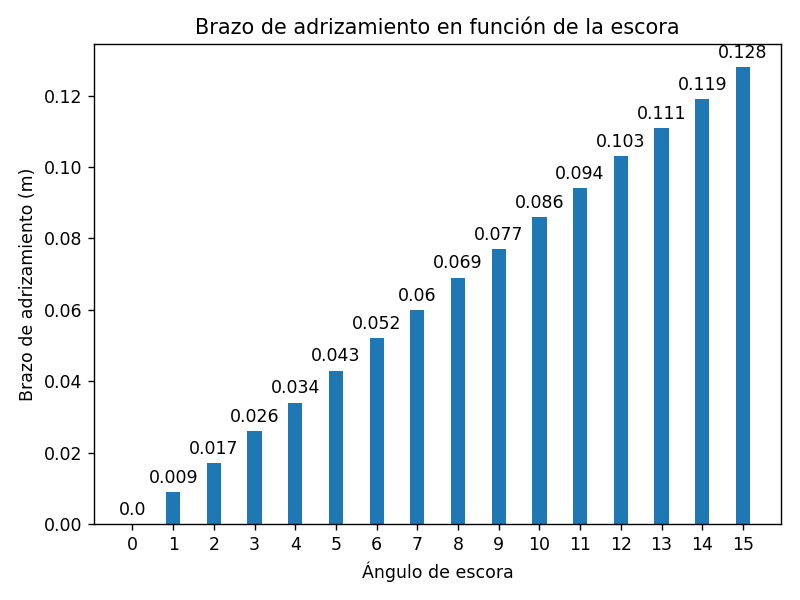

In [223]:
escoras = list(range(16))
brazos_de_adrizamiento = [round((GM * math.sin(math.radians(escora))),3) for escora in escoras]

x = np.arange(len(escoras))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, brazos_de_adrizamiento, width)

ax.set_ylabel("Brazo de adrizamiento (m)")
ax.set_xlabel('Ángulo de escora')
ax.set_title("Brazo de adrizamiento en función de la escora")
ax.set_xticks(x)
ax.set_xticklabels(escoras)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


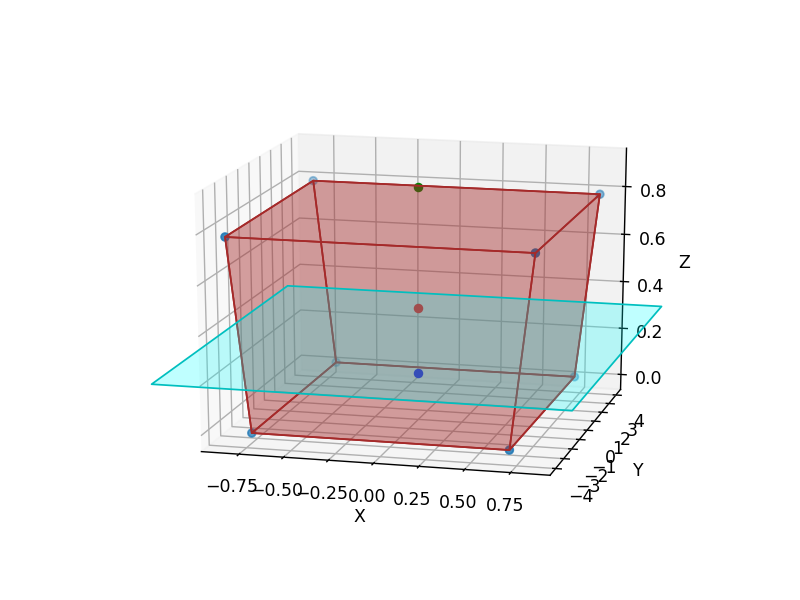

In [224]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

v = np.array([[-(base/2), -(eslora/2), 0],
                      [(base/2), -(eslora/2), 0],
                      [(base/2), (eslora/2), 0],
                      [-(base/2), (eslora/2), 0],
                      [-(manga/2), -(eslora/2), puntal],
                      [(manga/2), -(eslora/2), puntal],
                      [(manga/2), (eslora/2), puntal],
                      [-(manga/2), (eslora/2), puntal]])

proporcion_agua = 1.5
v_agua = np.array([[-(manga_altura_flotacion/2)*proporcion_agua, -(eslora/2)*proporcion_agua, altura_flotacion],
                      [(manga_altura_flotacion/2)*proporcion_agua, -(eslora/2)*proporcion_agua, altura_flotacion],
                      [(manga_altura_flotacion/2)*proporcion_agua, (eslora/2)*proporcion_agua, altura_flotacion],
                      [-(manga_altura_flotacion/2)*proporcion_agua, (eslora/2)*proporcion_agua, altura_flotacion]])

cg = np.array([0, 0, centro_de_gravedad])
cc = np.array([0, 0, centro_de_carena])
mc = np.array([0, 0, metacentro])

ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])

verts = [ [v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
        [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]] ]

verts_agua = [ [v_agua[0], v_agua[1], v_agua[2], v_agua[3]] ]

ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='brown', linewidths=1, edgecolors='brown', alpha=.25))

ax.add_collection3d(Poly3DCollection(verts_agua, 
 facecolors='cyan', linewidths=1, edgecolors='c', alpha=.25))

ax.scatter(cg[0], cg[1], cg[2], color='red')
ax.scatter(cc[0], cc[1], cc[2], color='blue')
ax.scatter(mc[0], mc[1], mc[2], color='green')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()